In [ ]:
!pip install pyedflib
import numpy as np
import matplotlib.pyplot as plotter
from pyedflib import highlevel
%matplotlib inline


     |████████████████████████████████| 1.1MB 4.6MB/s 
  Created wheel for pyedflib: filename=pyEDFlib-0.1.17-cp36-cp36m-linux_x86_64.whl size=920790 sha256=df4204b19ea6bc649a950cb7293998cc8e5e70108b302d89f3f699c87d5db817
  Stored in directory: /root/.cache/pip/wheels/f8/f2/6b/ce6178c882779963f57d9764c3856b7cb63dd9995579be6b23
Successfully built pyedflib


Link for Subject00_2.edf:
https://drive.google.com/open?id=1FqRPRD652sS4mQ2B3jYU4OoZa3yxHCrD

In [ ]:

signals, signal_headers, header = highlevel.read_edf('Subject00_2.edf')
print(signal_headers[0]['sample_rate']) 
print((signal_headers[0:2]))
print(len(signals[0]))
sfreq = signal_headers[0]['sample_rate']

500
[{'label': 'EEG Fp1', 'dimension': 'uV', 'sample_rate': 500, 'physical_max': 78.81055, 'physical_min': -93.352, 'digital_max': 32767, 'digital_min': -32768, 'prefilter': 'HP:0.500000Hz LP:45.000000Hz RF:50Hz', 'transducer': ''}, {'label': 'EEG Fp2', 'dimension': 'uV', 'sample_rate': 500, 'physical_max': 47.90948, 'physical_min': -82.3473, 'digital_max': 32767, 'digital_min': -32768, 'prefilter': 'HP:0.500000Hz LP:45.000000Hz RF:50Hz', 'transducer': ''}]
31000


[-0.19180527+0.j         -0.18891013-0.02197447j -0.18392499-0.04339433j
 ... -0.17573791+0.06371471j -0.18392499+0.04339433j
 -0.18891013+0.02197447j]


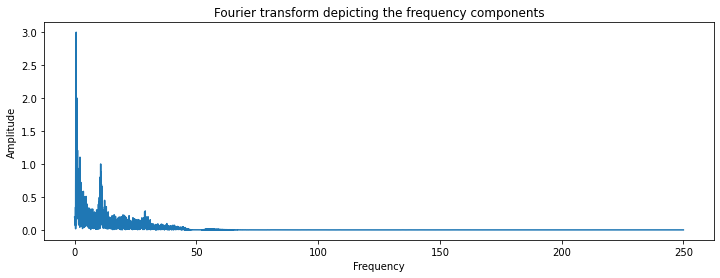

plotted


In [ ]:
#for i in range(21):
fourierTransform = np.fft.fft(signals[0])/len(signals[0])           # Normalize amplitude
print(fourierTransform)

fourierTransform = fourierTransform[range(int(len(signals[0])/2))] # Exclude sampling frequency
#print(fourierTransform)

 

tpCount     = len(signals[0])

values      = np.arange(int(tpCount/2))
    #print(values)

timePeriod  = tpCount/sfreq

frequencies = values/timePeriod



    # Frequency domain representation
figure, axis = plotter.subplots(1, 1, figsize = (12, 4))

plotter.subplots_adjust(hspace=3)
axis.set_title('Fourier transform depicting the frequency components')



axis.plot(frequencies, abs(fourierTransform))

axis.set_xlabel('Frequency')

axis.set_ylabel('Amplitude')

plotter.show()
print('plotted')